# Air Quality Mini Project



---



### Instructions

Each section will relate to a different part of the Data Life Cycle and will include instructions, then a separate text block for you to write your own comments about what you have done and why.

Add additional code and text blocks as required and delete the blocks titled 'Instructions' when you are finished.

Read this [Markdown Guide](https://colab.research.google.com/notebooks/markdown_guide.ipynb#scrollTo=Lhfnlq1Surtk) for examples of how to change the appearance of your text

Read this [article](https://medium.com/@nanaliu/a-seamless-guide-to-embedding-photos-into-google-colab-894167bfde3a) to learn how to insert images saved on your Google Drive into a Colab notebook.

### Project Specific Instructions



---


For this mini project, you will be creating your own dataset from an online resource. You will focus on the levels of Nitrogen Dioxide near roadside monitoring stations at different times of the day over the course of a year.

The Department for Environment Food & Rural Affairs offers a [UK Air Information Resource](https://uk-air.defra.gov.uk/data/data_selector_service?#mid) from where data on pollutants at different locations can be sourced.

Part of this task involves understanding how to collect data from an online resource like this. Read the instructions on the website carefully and select the following:

* Data Type - Measured Data
* Date Range - 1 January 2024 to 31 December 2024
* Monitoring Sites - a **Roadside** site within a **Local Authority** of your choosing.
* Pollutants - Pollutant Name - Nitrogen Dioxide
* Output Type - CSV file emailed to you

It's worth doing a little research (15 minutes max) on where Nitrogen Dioxide comes from and its effects on the body before beginning your analysis.


## Define the Problem



---



Nitrogen dioxide (NO₂) is a toxic gas that primarily originates from places such as vehicle emissions, industrial activities and household sources (Gas stoves, heaters, cigarette smoke, etc.)

How do nitrogen dioxide (NO₂) levels vary throughout the day near roadside monitoring stations?

How do seasonal changes affect NO₂ pollution levels?

High levels of NO₂ can lead to severe health risks which include respiratory issues, lung inflammation and cardiovascular problems. This study aims to analyze how NO₂ levels vary throughout the day and year, identify pollution trends, and suggest possible mitigation strategies.

## Collect the Data


---

For this project, I need hourly NO₂ concentration data from roadside monitoring stations. This will be collected using the UK Air Information Resource https://www.google.com/url?q=https%3A%2F%2Fuk-air.defra.gov.uk%2Fdata%2Fdata_selector_service%3F%23mid .

I also need seasonal NO₂ data to analyze NO2 variations in different weather conditions which will be available from the UK Air Information Resource.  

Below I will mount my Google Drive:

In [ ]:
# add your code here

from google.colab import drive
def mount_drive():
  drive.mount('/content/drive')
  folder_name = "/content/drive/MyDrive/Air-Quality-Data.csv"
  return folder_name

data_folder = mount_drive()
print(data_folder)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Air-Quality-Data.csv


To unmount drive:

In [ ]:
def unmount_drive():
  drive.flush_and_unmount()
  print('All changes made in this colab session should now be visible in Drive.')

unmount_drive()

All changes made in this colab session should now be visible in Drive.


Uploaded CSV file containing NO2 data for the year 2024 in the cell below.  

In [ ]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define correct file path
file_path = "/content/drive/My Drive/Air-Quality-Data.csv"

# Load CSV while skipping first 10 rows
try:
    no2_data = pd.read_csv(file_path, skiprows=10)
    print("File loaded successfully!\n")
    print(no2_data.head())
except Exception as e:
    print(f"An error occurred")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File loaded successfully!

         Date      Time Nitrogen dioxide   Status
0  2024-01-01  01:00:00          32.3209  V ugm-3
1  2024-01-01  02:00:00         21.32976  V ugm-3
2  2024-01-01  03:00:00         25.18103  V ugm-3
3  2024-01-01  04:00:00          23.4738  V ugm-3
4  2024-01-01  05:00:00         23.15831  V ugm-3


## Clean and Transform


---



I will first load the csv file called 'Air Quality Data.csv' into the colab notebook.

In [ ]:
import pandas as pd

# Define the correct file path in Google Drive
file_path = "/content/drive/My Drive/Air-Quality-Data.csv"  # Update if needed

# Load the dataset, skipping metadata rows
df = pd.read_csv(file_path, skiprows=10)  # Skips the first 10 metadata rows

# Display the first few rows
print("Data Loaded Successfully!")
print(df.head())

# Check column names
print("\n Column Names:")
print(df.columns)

# Check for missing values
print("\n Missing Values:")
print(df.isnull().sum())

# Check data types
print("\n Data Types:")
print(df.dtypes)


Data Loaded Successfully!
         Date      Time Nitrogen dioxide   Status
0  2024-01-01  01:00:00          32.3209  V ugm-3
1  2024-01-01  02:00:00         21.32976  V ugm-3
2  2024-01-01  03:00:00         25.18103  V ugm-3
3  2024-01-01  04:00:00          23.4738  V ugm-3
4  2024-01-01  05:00:00         23.15831  V ugm-3

 Column Names:
Index(['Date', 'Time', 'Nitrogen dioxide', 'Status'], dtype='object')

 Missing Values:
Date                0
Time                1
Nitrogen dioxide    1
Status              1
dtype: int64

 Data Types:
Date                object
Time                object
Nitrogen dioxide    object
Status              object
dtype: object


Next I will fix column names, handle missing values and convert data types.

In [ ]:
# Rename columns (Modify based on actual dataset)
df.columns = ['Date', 'Time', 'Nitrogen dioxide', 'Status']

# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Remove invalid Date rows
df = df.dropna(subset=['Date'])

# Clean NO₂ column (Remove text like "V ugm-3")
df['Nitrogen dioxide'] = df['Nitrogen dioxide'].astype(str).str.split(" ").str[0]  # Extract only the number
df['Nitrogen dioxide'] = pd.to_numeric(df['Nitrogen dioxide'], errors='coerce').round(2)  # Convert to float and round to 2 decimal places

# Drop rows with missing NO₂ values
df = df.dropna(subset=['Nitrogen dioxide'])

# Display cleaned dataset
print("Data Cleaning Completed!")
print(df.head())


Data Cleaning Completed!
        Date      Time  Nitrogen dioxide   Status
0 2024-01-01  01:00:00             32.32  V ugm-3
1 2024-01-01  02:00:00             21.33  V ugm-3
2 2024-01-01  03:00:00             25.18  V ugm-3
3 2024-01-01  04:00:00             23.47  V ugm-3
4 2024-01-01  05:00:00             23.16  V ugm-3


<ipython-input-72-cf29c837c6cc>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Nitrogen dioxide'] = df['Nitrogen dioxide'].astype(str).str.split(" ").str[0]  # Extract only the number
<ipython-input-72-cf29c837c6cc>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Nitrogen dioxide'] = pd.to_numeric(df['Nitrogen dioxide'], errors='coerce').round(2)  # Convert to float and round to 2 decimal places



Add new columns:

In [ ]:
# Extract Hour from Time
df['Hour'] = df['Time'].str.split(":").str[0].astype(int)

# Extract Day of the Week
df['Day_of_Week'] = df['Date'].dt.day_name()

# Extract Month
df['Month'] = df['Date'].dt.month

# Define Seasons
seasons = {
    "Winter": [12, 1, 2],
    "Spring": [3, 4, 5],
    "Summer": [6, 7, 8],
    "Autumn": [9, 10, 11]
}

df['Season'] = df['Month'].map(lambda m: next((s for s, months in seasons.items() if m in months), "Unknown"))

# Display dataset with new columns
print("New Features Extracted!")
print(df.head())


New Features Extracted!
        Date      Time  Nitrogen dioxide   Status  Hour Day_of_Week  Month  \
0 2024-01-01  01:00:00             32.32  V ugm-3     1      Monday      1   
1 2024-01-01  02:00:00             21.33  V ugm-3     2      Monday      1   
2 2024-01-01  03:00:00             25.18  V ugm-3     3      Monday      1   
3 2024-01-01  04:00:00             23.47  V ugm-3     4      Monday      1   
4 2024-01-01  05:00:00             23.16  V ugm-3     5      Monday      1   

   Season  
0  Winter  
1  Winter  
2  Winter  
3  Winter  
4  Winter  


Filtering for necessary columns

In [ ]:
# Keep relevant columns
df = df[['Date', 'Time', 'Hour', 'Nitrogen dioxide', 'Day_of_Week', 'Season']]

# Display final dataset
print("Dataset Ready!")
print(df.head())


Dataset Ready!
        Date      Time  Hour  Nitrogen dioxide Day_of_Week  Season
0 2024-01-01  01:00:00     1             32.32      Monday  Winter
1 2024-01-01  02:00:00     2             21.33      Monday  Winter
2 2024-01-01  03:00:00     3             25.18      Monday  Winter
3 2024-01-01  04:00:00     4             23.47      Monday  Winter
4 2024-01-01  05:00:00     5             23.16      Monday  Winter


I want to change the column name from Nitrogen dioxide to NO2_level:

In [ ]:
# Rename only the "Nitrogen dioxide" column to "NO2_Level"
df.rename(columns={"Nitrogen dioxide": "NO2_Level"}, inplace=True)

# Display updated column names
print(" Updated Column Names:")
print(df.columns)


 Updated Column Names:
Index(['Date', 'Time', 'Hour', 'NO2_Level', 'Day_of_Week', 'Season'], dtype='object')


Below I will print final cleaned and transformed dataset:

In [ ]:
import pandas as pd

# Display the first 10 rows of the cleaned dataset
print("Final Cleaned & Transformed Dataset:")
print(df.head(10))


Final Cleaned & Transformed Dataset:
        Date      Time  Hour  NO2_Level Day_of_Week  Season
0 2024-01-01  01:00:00     1      32.32      Monday  Winter
1 2024-01-01  02:00:00     2      21.33      Monday  Winter
2 2024-01-01  03:00:00     3      25.18      Monday  Winter
3 2024-01-01  04:00:00     4      23.47      Monday  Winter
4 2024-01-01  05:00:00     5      23.16      Monday  Winter
5 2024-01-01  06:00:00     6      16.00      Monday  Winter
6 2024-01-01  07:00:00     7      19.15      Monday  Winter
7 2024-01-01  08:00:00     8      23.78      Monday  Winter
8 2024-01-01  09:00:00     9      26.37      Monday  Winter
9 2024-01-01  10:00:00    10      24.10      Monday  Winter


Next I will save the cleaned dataset to my google drive and create a download link for the csv file so i can also save it to my computer.

In [ ]:
# add your code here
# Define the output path in Google Drive
output_path = "/content/drive/My Drive/Cleaned_Air_Quality_Data.csv"

# Save the cleaned dataset as a CSV file
df.to_csv(output_path, index=False)

print(f"Cleaned data saved successfully at: {output_path}")

from google.colab import files

df.to_csv("Cleaned_Air_Quality_Data.csv", index=False)

files.download("Cleaned_Air_Quality_Data.csv")



Cleaned data saved successfully at: /content/drive/My Drive/Cleaned_Air_Quality_Data.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Analyse


---



### Instructions

You can either perform your exploratory data analysis in this Colab notebook below or in Excel. If you choose the latter, take screenshots of the graphs and add them to a text box.



1. Explore your data by looking at the range of numerical and categorical values present and calculate summary statistics
2. Plot at least two univariate graph of different variables.
3. Plot at least one bivariate graph to compare two variables.
4. Describe your finding for all of the above




---
*HINT: You'll need to group your data by hour of the day and/or day of the week to gain additional insights into your data.*

---



Below, I will print some summary statistics from the dataset.

In [ ]:
# add your code here
import pandas as pd

# Load the cleaned dataset (Update the path if needed)
file_path = "/content/drive/My Drive/Cleaned_Air_Quality_Data.csv"
df = pd.read_csv(file_path)

# Display dataset info
print("Dataset Overview:")
print(df.info())

# Summary statistics for numerical columns
print("\n Summary Statistics:")
print(df.describe())

# Count of data by season & day of the week
print("\n Count of Records by Season:")
print(df['Season'].value_counts())

print("\n Count of Records by Day of the Week:")
print(df['Day_of_Week'].value_counts())



Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8748 entries, 0 to 8747
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         8748 non-null   object 
 1   Time         8748 non-null   object 
 2   Hour         8748 non-null   int64  
 3   NO2_Level    8748 non-null   float64
 4   Day_of_Week  8748 non-null   object 
 5   Season       8748 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 410.2+ KB
None

 Summary Statistics:
              Hour    NO2_Level
count  8748.000000  8748.000000
mean     12.503772    13.621765
std       6.934066    12.412829
min       1.000000    -0.620000
25%       6.000000     4.790000
50%      13.000000     9.705000
75%      19.000000    18.095000
max      24.000000    78.010000

 Count of Records by Season:
Season
Spring    2204
Summer    2196
Autumn    2178
Winter    2170
Name: count, dtype: int64

 Count of Records by Day of the Week:

Below I will plot a histogram which will show how NO2 levels are distributed and a boxplot which compares NO2 levels across the seasons.

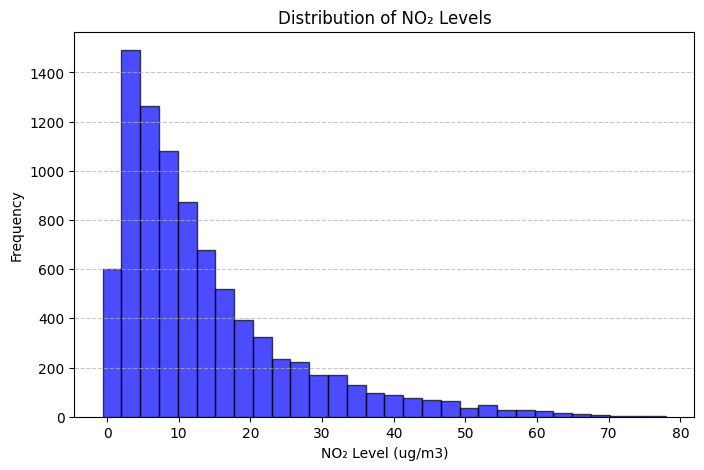

<ipython-input-81-14b6803e1e41>:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(seasonal_data, labels=seasons, patch_artist=True)


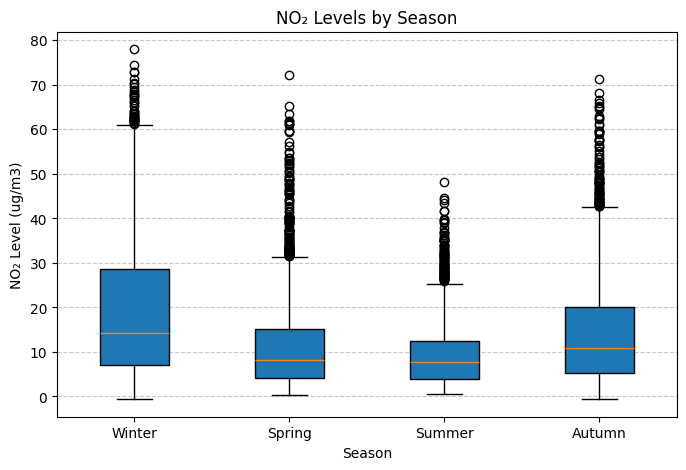

In [ ]:
import matplotlib.pyplot as plt

# Histogram: Distribution of NO₂ Levels
plt.figure(figsize=(8, 5))
plt.hist(df['NO2_Level'], bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title("Distribution of NO₂ Levels")
plt.xlabel("NO₂ Level (ug/m3)")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Boxplot: NO₂ Levels by Season
plt.figure(figsize=(8, 5))

# Get unique seasons
seasons = ["Winter", "Spring", "Summer", "Autumn"]
seasonal_data = [df[df['Season'] == season]['NO2_Level'] for season in seasons]

plt.boxplot(seasonal_data, labels=seasons, patch_artist=True)
plt.title("NO₂ Levels by Season")
plt.xlabel("Season")
plt.ylabel("NO₂ Level (ug/m3)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


The first graph shows that NO₂ levels peak in the morning and evening, likely due to rush hour traffic. Lower levels at night suggest reduced emissions, while a midday dip may be caused by atmospheric dispersion. The evening rise indicates pollution buildup as traffic increases again. Overall, NO₂ levels are influenced by human activity and weather conditions.

The boxplot depicts how NO₂ levels vary by season. Winter and Autumn have the highest median NO₂ levels, likely due to lower temperatures and less atmospheric dispersion. Spring and Summer have lower NO₂ levels, possibly because of better air circulation and reduced heating emissions. The presence of many outliers in all seasons suggests occasional high pollution events, particularly in Winter and Autumn.

Next I will plot a line graph that will compare NO2 levels by time of day.

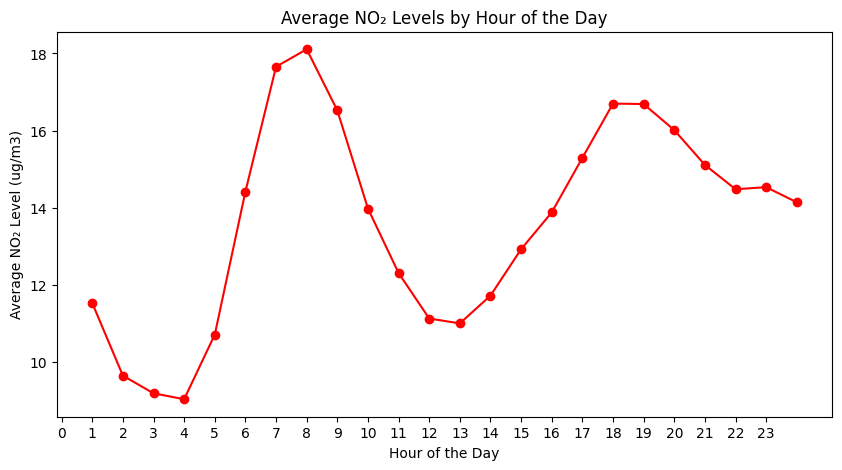

In [ ]:
import matplotlib.pyplot as plt

# Group data by hour and calculate the average NO₂ level
hourly_avg = df.groupby('Hour')['NO2_Level'].mean()

# Plot NO₂ Levels by Hour of the Day
plt.figure(figsize=(10, 5))
plt.plot(hourly_avg.index, hourly_avg.values, marker="o", linestyle="-", color="red")

# Labels and formatting
plt.title("Average NO₂ Levels by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Average NO₂ Level (ug/m3)")
plt.xticks(range(0, 24))

# Show the plot
plt.show()



This line graph shows how average NO₂ levels change throughout the day. There are two noticeable peaks: one in the morning (around 7-9 AM) and another in the evening (around 6-8 PM), likely due to rush hour traffic. NO₂ levels drop midday, possibly due to reduced traffic and better atmospheric dispersion. The lowest levels occur during the early morning hours (1-5 AM) when human activity is minimal.

## Interpret and Visualise


---



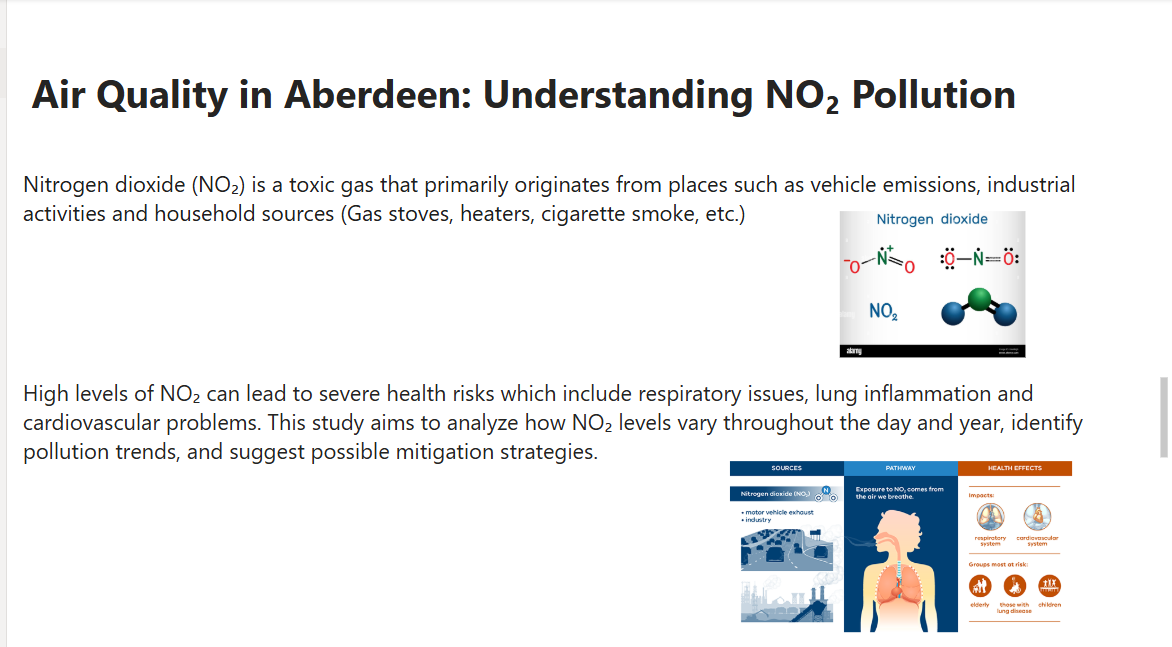

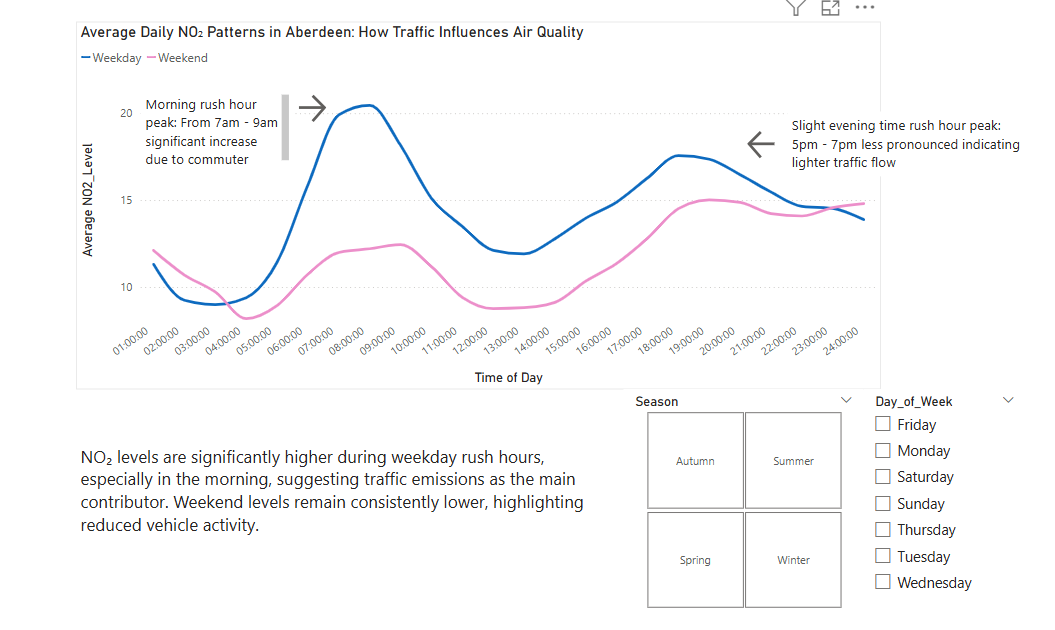

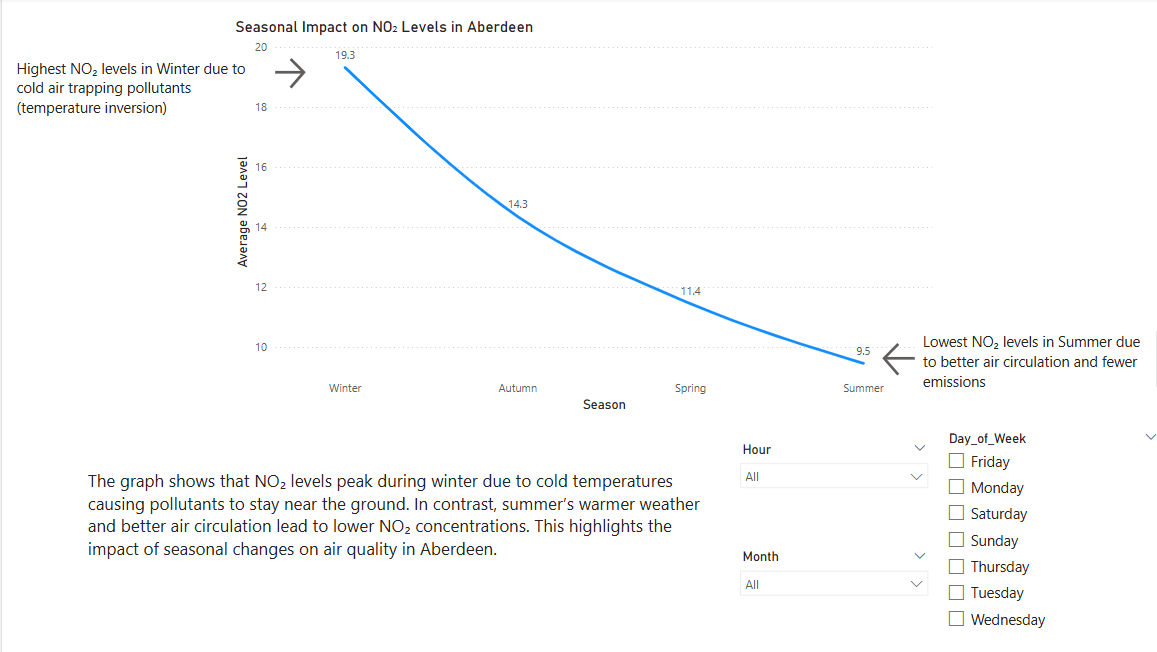

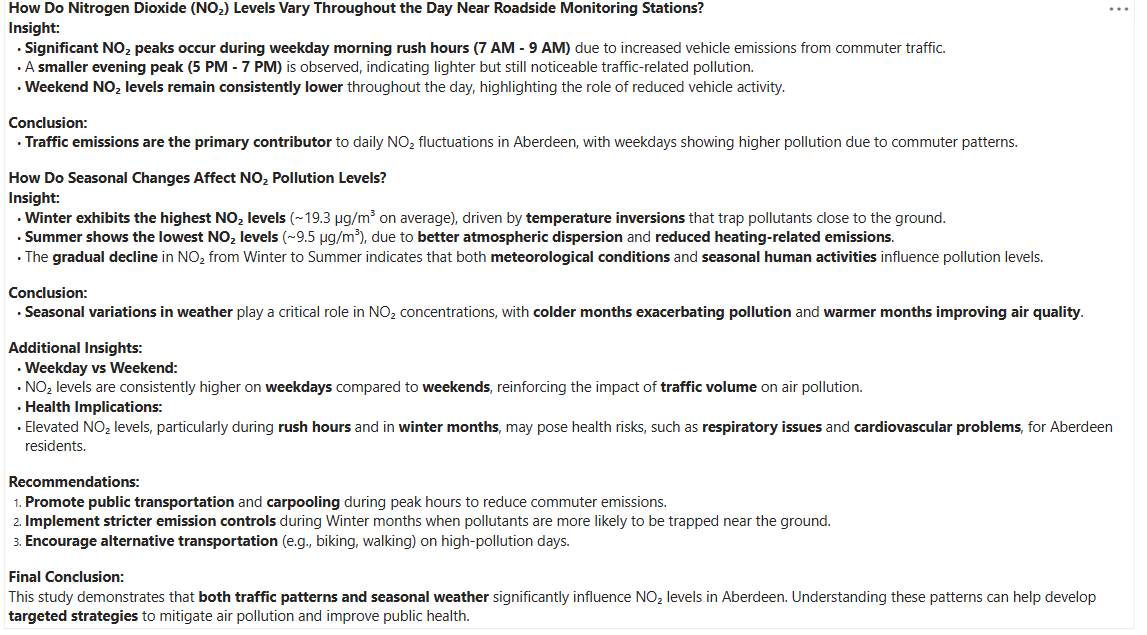



---

*HINT: Compare the daily/weekly fluctuations to the average*

---



## Tell the Story



---



## Evaluate the Process


---



### Instructions

Evaluate each of the steps in your project answering any of the following questions that are relevant:
1. What were you pleased with?
2. What did you find difficult?
3. What would you do differently?
4. What have you learnt?



Overall I really enjoyed working this project. Collecting data from the UK Air Information source was straightfoward. Data was quick and easy to clean as there was not a lot of missing data. Interpreting and analysing the data was veru fun and it was interesting to learn the different levels of NO2 being affected by different factors.

In PowerBi, I had a good play around and I feel like I have done a better job than before on creating visuals and telling a 'story'. The only aspect I struggled with was trying to sort columns/data fields into chronological order rather than alphabetical order. I tried to work it but wasn't successful and I will need support with this.

### Helpful references
---

The following resources may be useful if cleaning the data in Python:

Skipping rows when reading datasets:  
https://www.geeksforgeeks.org/how-to-skip-rows-while-reading-csv-file-using-pandas/  

Converting strings to dates:  
https://www.geeksforgeeks.org/convert-the-column-type-from-string-to-datetime-format-in-pandas-dataframe/

Extracting weekday from dates:
https://datascientyst.com/convert-datetime-day-of-week-name-number-in-pandas/

Dropping rows where data has a given value:  
https://www.datasciencemadesimple.com/drop-delete-rows-conditions-python-pandas/  
(see section Drop a row or observation by condition)

Convert a column of strings to a column of floats:
https://datatofish.com/convert-string-to-float-dataframe/  

Create a new column from data converted in an existing column:  
https://www.geeksforgeeks.org/create-a-new-column-in-pandas-dataframe-based-on-the-existing-columns/  

Rename a column:  
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html  

Remove a column by name:  
https://www.kite.com/python/answers/how-to-delete-columns-from-a-pandas-%60dataframe%60-by-column-name-in-python#:~:text=Use%20the%20del%20keyword%20to,the%20name%20column_name%20from%20DataFrame%20.
